#### Goal - read 2005 data

In [15]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sys import platform
import io
import datetime

if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/puyallup/"
    output_string = "/home/maria/Documents/output/pied_piper/puyallup/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/puyallup/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/puyallup/"

In [16]:
# #read file in Windows
try:
    df = pd.read_excel(
   io=data_string + "puyallup_chinook_2004-2018.xlsx",
   sheet_name ='2005',
    header = [3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

columns = list(df)
print(columns)

['Date', 'Flow (cfs)', 'Secchi Depth (cm)', 'Hours of Day', '# of Fish Caught (Day)', 'CPUE (Day)', 'Estimated Production Day', 'Hours of Night', '# of Fish Caught (Night)', 'CPUE (Night)', 'Estimated Production Night', 'Total Hours', 'Total CPUE', 'Total Fish Captured', 'Daily Production Estimates', 'Unnamed: 15', 'Unnamed: 16', 'Date.1', 'Flow (cfs).1', 'Secchi Depth (cm).1', 'Hours    of       Day', '# of Fish Caught (Day).1', 'CPUE (Day).1', 'Estimated Production Day.1', 'Hours of  Night', '# of Fish Caught (Night).1', 'CPUE (Night).1', 'Estimated Production Night.1', 'Total Hours.1', 'Total CPUE.1', 'Total Fish Captured.1']


In [17]:
df.rename(columns = {
    'Flow (cfs)':'flow',
    'Secchi Depth (cm)':'secchi_depth',
    'Hours of Day':'In_day',
    '# of Fish Caught (Day)':'chinook0_wild_num_day',
    'CPUE (Day)':'chinook0_wild_perhour_day',
    '# of Fish Caught (Night)': 'chinook0_wild_num_night',
    'CPUE (Night)':'chinook0_wild_perhour_night',
    'Total CPUE':'chinook0_wild_perhour',
    'Total Fish Captured':'chinook0_wild_num',
    '# of Fish Caught (Day).1':'chinook0_hatchery_num_day',
    'CPUE (Day).1':'chinook0_hatchery_perhour_day',
    'Hours of Night':'In_night',
    '# of Fish Caught (Night).1':'chinook0_hatchery_num_night',
    'CPUE (Night).1':'chinook0_hatchery_perhour_night',
    'Total CPUE.1':'chinook0_hatchery_perhour',
    'Total Fish Captured.1':'chinook0_hatchery_num',
    'Total Hours':'In',
    'Estimated Production Day':'chinook0_wild_num_day_estimate',
    'Estimated Production Night':'chinook0_wild_num_night_estimate',
    'Estimated Production Day.1':'chinook0_hatchery_num_day_estimate',
    'Estimated Production Night.1':'chinook0_hatchery_num_night_estimate'
    
}, inplace = True)

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,Date,flow,secchi_depth,In_day,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_day_estimate,In_night,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_wild_num_night_estimate,In,chinook0_wild_perhour,chinook0_wild_num,Daily Production Estimates,Unnamed: 15,Unnamed: 16,Date.1,Flow (cfs).1,Secchi Depth (cm).1,Hours of Day,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_day_estimate,Hours of Night,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_hatchery_num_night_estimate,Total Hours.1,chinook0_hatchery_perhour,chinook0_hatchery_num
0,2005-02-26,726,135.00,6.5,0,0,0,14.25,0,0,0,20.75,0,0.0,0.000000,NaN,NaN,2005-02-26,726,135.00,6.5,0,0,0,14.25,0,0,0,20.75,0,0.000000
1,2005-02-27,719,134.00,-,0,-,-,-,0,-,-,22.75,0,0.0,0.000000,NaN,NaN,2005-02-27,719,134.00,-,-,-,-,-,0,-,-,22.75,0,0.000000
2,2005-02-28,733,135.00,8.75,0,0,0,15.75,0,0,0,24.5,0,0.0,0.000000,NaN,NaN,2005-02-28,733,135.00,8.75,0,0,0,15.75,0,0,0,24.5,0,0.000000
3,2005-03-01,756,135.00,-,-,-,-,-,-,-,-,23,0,0.0,0.000000,NaN,NaN,2005-03-01,756,135.00,-,-,-,-,-,-,-,-,23,0,0.000000
4,2005-03-02,746,139.00,-,-,-,-,-,-,-,-,23.75,0,0.0,0.000000,NaN,NaN,2005-03-02,746,139.00,-,-,-,-,-,-,-,-,23.75,0,0.000000
5,2005-03-03,744,137.00,-,-,-,-,-,-,-,-,23.75,0,0.0,0.000000,NaN,NaN,2005-03-03,744,137.00,-,-,-,-,-,-,-,-,23.75,0,0.000000
6,2005-03-04,725,138.00,-,-,-,-,-,-,-,-,24.5,0,0.0,0.000000,NaN,NaN,2005-03-04,725,138.00,-,-,-,-,-,-,-,-,24.5,0,0.000000
7,2005-03-05,711,138.00,-,-,-,-,-,1,-,65.0597,23.75,0.0421053,1.0,65.000000,NaN,NaN,2005-03-05,711,138.00,-,-,-,-,-,-,-,-,23.75,0,0.000000
8,2005-03-06,700,134.00,-,-,-,-,-,-,-,-,23,0,0.0,0.000000,NaN,NaN,2005-03-06,700,134.00,-,-,-,-,-,-,-,-,23,0,0.000000
9,2005-03-07,699,138.00,-,-,-,-,-,-,-,-,24,0,0.0,0.000000,NaN,NaN,2005-03-07,699,138.00,-,-,-,-,-,-,-,-,24,0,0.000000


In [19]:
df.columns

Index(['Date', 'flow', 'secchi_depth', 'In_day', 'chinook0_wild_num_day',
       'chinook0_wild_perhour_day', 'chinook0_wild_num_day_estimate',
       'In_night', 'chinook0_wild_num_night', 'chinook0_wild_perhour_night',
       'chinook0_wild_num_night_estimate', 'In', 'chinook0_wild_perhour',
       'chinook0_wild_num', 'Daily Production Estimates', 'Unnamed: 15',
       'Unnamed: 16', 'Date.1', 'Flow (cfs).1', 'Secchi Depth (cm).1',
       'Hours    of       Day', 'chinook0_hatchery_num_day',
       'chinook0_hatchery_perhour_day', 'chinook0_hatchery_num_day_estimate',
       'Hours of  Night', 'chinook0_hatchery_num_night',
       'chinook0_hatchery_perhour_night',
       'chinook0_hatchery_num_night_estimate', 'Total Hours.1',
       'chinook0_hatchery_perhour', 'chinook0_hatchery_num'],
      dtype='object')

In [21]:
df_subset = df[['Date', 'flow', 'secchi_depth','In_day','In_night','In',
                'chinook0_wild_num_day','chinook0_wild_perhour_day',
                'chinook0_wild_num_night','chinook0_wild_perhour_night',
                'chinook0_hatchery_num_day','chinook0_hatchery_perhour_day',
                'chinook0_hatchery_num_night','chinook0_hatchery_perhour_night',
                'chinook0_wild_perhour','chinook0_hatchery_perhour','chinook0_wild_num','chinook0_hatchery_num',
                'chinook0_wild_num_day_estimate','chinook0_wild_num_night_estimate',
               'chinook0_hatchery_num_day_estimate','chinook0_hatchery_num_night_estimate']]

df_subset.loc[(df_subset['In_day'] == '-'),'chinook0_wild_num_day':'chinook0_wild_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == 'Out'),'chinook0_wild_num_day':'chinook0_wild_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == 'Out '),'chinook0_wild_num_day':'chinook0_wild_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == 'ST'),'chinook0_wild_num_day':'chinook0_wild_perhour_day'] =np.nan

df_subset.loc[(df_subset['In_day'] == '-'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == 'Out'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == 'Out '),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_day'] =np.nan
df_subset.loc[(df_subset['In_day'] == 'ST'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_day'] =np.nan

df_subset.loc[(df_subset['In_night'] == '-'),'chinook0_wild_num_night':'chinook0_wild_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == 'ST'),'chinook0_wild_num_night':'chinook0_wild_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == 'Out'),'chinook0_wild_num_night':'chinook0_wild_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == 'Out '),'chinook0_wild_num_night':'chinook0_wild_perhour_night'] =np.nan

df_subset.loc[(df_subset['In_night'] == '-'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == 'Out'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == 'Out '),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_night'] =np.nan
df_subset.loc[(df_subset['In_night'] == 'ST'),'chinook0_hatchery_num_day':'chinook0_hatchery_perhour_night'] =np.nan
df_subset = df_subset.replace({'-':np.nan})
df_subset = df_subset.replace({'ST':np.nan})
df_subset = df_subset.replace({'Out':np.nan})
df_subset = df_subset.replace({'Out ':np.nan})

df_subset['chinook0_wild_perhour_day_estimate'] = (df_subset['chinook0_wild_num_day_estimate']/
                                                   df_subset['In_day'])
df_subset['chinook0_wild_perhour_night_estimate'] = (df_subset['chinook0_wild_num_night_estimate']/
                                                   df_subset['In_night'])
df_subset['chinook0_wild_perhour_estimate'] = ((df_subset['chinook0_wild_num_day_estimate']+df_subset['chinook0_wild_num_night_estimate'])/
                                                   df_subset['In'])

df_subset['chinook0_hatchery_perhour_day_estimate'] = (df_subset['chinook0_hatchery_num_day_estimate']/
                                                   df_subset['In_day'])
df_subset['chinook0_hatchery_perhour_night_estimate'] = (df_subset['chinook0_hatchery_num_night_estimate']/
                                                   df_subset['In_night'])
df_subset['chinook0_hatchery_perhour_estimate'] = ((df_subset['chinook0_hatchery_num_day_estimate']+df_subset['chinook0_hatchery_num_night_estimate'])/
                                                   df_subset['In'])



In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_subset)

,Date,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,chinook0_wild_perhour_night,chinook0_hatchery_num_day,chinook0_hatchery_perhour_day,chinook0_hatchery_num_night,chinook0_hatchery_perhour_night,chinook0_wild_perhour,chinook0_hatchery_perhour,chinook0_wild_num,chinook0_hatchery_num,chinook0_wild_num_day_estimate,chinook0_wild_num_night_estimate,chinook0_hatchery_num_day_estimate,chinook0_hatchery_num_night_estimate,chinook0_wild_perhour_day_estimate,chinook0_wild_perhour_night_estimate,chinook0_wild_perhour_estimate,chinook0_hatchery_perhour_day_estimate,chinook0_hatchery_perhour_night_estimate,chinook0_hatchery_perhour_estimate
0,2005-02-26,726,135.00,6.50,14.25,20.75,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2005-02-27,719,134.00,NaN,NaN,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-02-28,733,135.00,8.75,15.75,24.50,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2005-03-01,756,135.00,NaN,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-03-02,746,139.00,NaN,NaN,23.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-03-03,744,137.00,NaN,NaN,23.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-03-04,725,138.00,NaN,NaN,24.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-03-05,711,138.00,NaN,NaN,23.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042105,0.000000,1.0,0.000000,NaN,65.059692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-03-06,700,134.00,NaN,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-03-07,699,138.00,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_subset['chinook0_wild_perhour_total'] = (df_subset['chinook0_wild_perhour_day'] + 
                                            df_subset['chinook0_wild_perhour_night'])

df_subset['chinook0_hatchery_perhour_total'] = (df_subset['chinook0_hatchery_perhour_day'] + 
                                            df_subset['chinook0_hatchery_perhour_night'])

#these totals are not the same as chinook0_wild_perhour and it is only used to calculate fractions

df_subset['chinook0_wild_day_fraction'] = np.nan
df_subset['chinook0_hatchery_day_fraction'] = np.nan
n = len(df_subset['chinook0_wild_perhour_total'])

for i in range(n):
    if df_subset['chinook0_wild_perhour_day'].loc[i]==0 and df_subset['chinook0_wild_perhour_total'].loc[i] == 0:
        df_subset['chinook0_wild_day_fraction'].loc[i] = np.nan
        
    else:
        df_subset['chinook0_wild_day_fraction'].loc[i] = (df_subset['chinook0_wild_perhour_day'].loc[i]/
                                                          df_subset['chinook0_wild_perhour_total'].loc[i])
        
    if df_subset['chinook0_hatchery_perhour_day'].loc[i]==0 and df_subset['chinook0_hatchery_perhour_total'].loc[i] == 0:
        df_subset['chinook0_hatchery_day_fraction'].loc[i] = np.nan
        
    else:
        df_subset['chinook0_hatchery_day_fraction'].loc[i] = (df_subset['chinook0_hatchery_perhour_day'].loc[i]/
                                                          df_subset['chinook0_hatchery_perhour_total'].loc[i])
        
df_subset = df_subset.drop(['chinook0_wild_perhour_total','chinook0_hatchery_perhour_total'],axis = 1)

/home/maria/miniconda3/envs/analysis/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


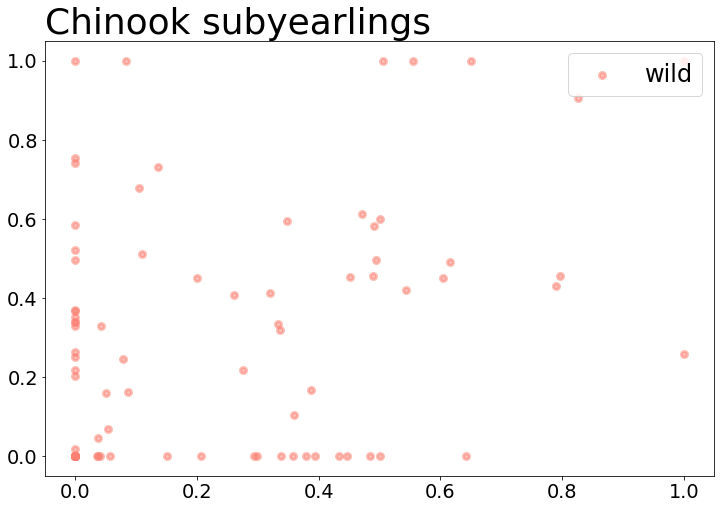

In [27]:
fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.scatter(
    df_subset['chinook0_hatchery_day_fraction'], df_subset['chinook0_wild_day_fraction'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


# ax1.scatter(df_subset['Date'], df_subset['chinook0_hatchery_day_fraction'], color = 'lightseagreen', 
#          label = 'hatchery', alpha = 0.5, linewidth = lw)

# plt.gcf().autofmt_xdate()
# plt.xlabel('Date', size = 0.9*fs)
# plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

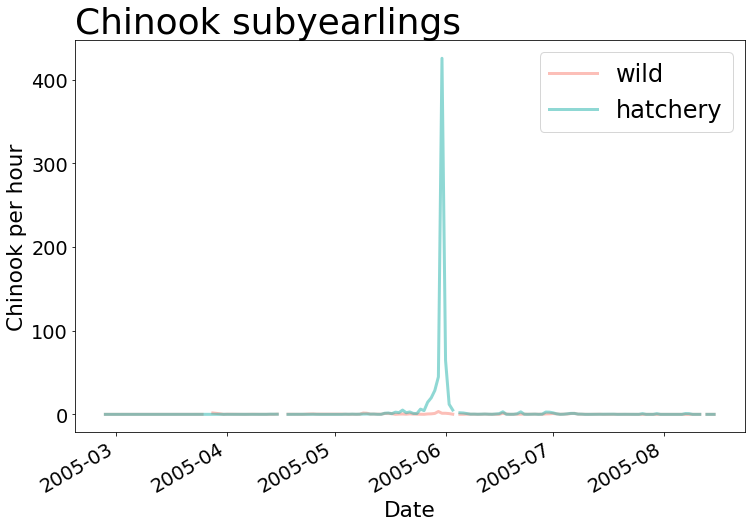

In [28]:
#plotting all of them

fs=24
lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)


ax1.plot(
    df_subset['Date'], df_subset['chinook0_wild_perhour'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


ax1.plot(df_subset['Date'], df_subset['chinook0_hatchery_perhour'], color = 'lightseagreen', 
         label = 'hatchery', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook subyearlings', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


In [29]:
#save the data

df_subset.to_csv(data_string + "2005_puyallup.csv")  